## Исследование объявлений о продаже квартир

### Источник данных
Данные сервиса Яндекс.Недвижимость: параметры квартир и параметры объявлений о продаже в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

### Основные цели проекта
Научиться определять рыночную стоимость объектов недвижимости и их типичные параметры.

## 1. Изучение общей информации

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
#Определяю количество пропущенных значений в столбцах таблицы.
print(data.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [4]:
#Вывожу списки уникальных значений для каждого столбца, чтобы найти пропуски и аномальные значения.
for column in list(data):
    print('Столбец', column, ':', data[column].unique())

Столбец total_images : [20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
Столбец last_price : [13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
Столбец total_area : [108.    40.4   56.   ...  66.86 133.81  76.75]
Столбец first_day_exposition : ['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']
Столбец rooms : [ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
Столбец ceiling_height : [  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2

### Вывод

При превом изучении видно, что:
- необходимо изменить тип данных столбцам: last_price, first_day_exposition;
- необходимо изменить тип данных и обработать пропуски столбцам: balcony, airports_nearest, cityCenters_nearest, days_exposition, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, floors_total;
- обработать пропуски столбцов: is_apartment, kitchen_area, ceiling_height, living_area;
- найти в столбце rooms те строки, где studio == True, а число комнат больше 0, и сделать замену;
- обработать пропуски и убрать дубли столбца: locality_name.

Столбцы total_images, floor, total_area, open_plan, studio в предобработке не нуждаются.

## 2. Предобработка данных

#### Изучу студии с ненулевым количеством комнат.

In [5]:
#Обработаю студии с ненулевым количеством комнат. Проверю, что заменились все.
data.loc[(data['studio'] == True) & (data['rooms'] != 0), 'rooms'] = 0
data.query('studio == True and rooms!= 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Изучу столбец 'balcony'. 

In [6]:
#Обработаю пропуски в столбце 'balcony'. Делаю предположение, что, если пропущено количество болконов, то их нет. 
#Проверю, что заменились все.
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

Заменю тип данных столбцу с количеством балконов. Эта величина не может быть дробной.

In [7]:
data['balcony'] = data['balcony'].astype(int)

#### Обработаю столбец 'first_day_exposition'.

In [8]:
#Заменю тип данных столбцу с датой:'first_day_exposition' с object на datetime. Посмотрю на результат.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(data['first_day_exposition'].head(3))

0   2019-03-07
1   2018-12-04
2   2015-08-20
Name: first_day_exposition, dtype: datetime64[ns]


Делаю замену для возможности работы с датой.

#### Изучу пропуски в столбце 'floors_total'.

In [9]:
print(data['floors_total'].isna().sum())
data.query('floors_total == "nan"')

86


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02,2,NaN,NaN,30.80,4,NaN,...,12.00,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23,1,NaN,NaN,20.75,1,NaN,...,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01,2,NaN,NaN,38.40,12,NaN,...,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06,3,NaN,NaN,47.10,8,NaN,...,16.80,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22,1,NaN,NaN,NaN,9,NaN,...,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24,2,2.8,NaN,NaN,3,NaN,...,NaN,0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02,2,NaN,NaN,31.70,20,NaN,...,14.40,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20,3,NaN,NaN,45.38,6,NaN,...,23.42,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25,3,NaN,NaN,50.40,18,NaN,...,23.60,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


У меня было предположение, что пропуски могут быть связаны со столбцом 'floor'. Например, дом одноэтажный, тогда квартиры были бы расположены на 1 этаже. Но гипотеза не подтвердилась, этажи квартир различные. Оставлю данные пропущенными. Их не очень много: 86.

Почему могли пропускать это значение при заполнении? Может продавец считал его неважным, т.к. уже указал этаж квартиры.

Так как пропуски остаются, сменю тип данных на Int64. Дробных этажей не бывает.

In [10]:
data['floors_total'] = data['floors_total'].astype('float32').astype('Int64')

In [11]:
#Посмотрю на выбросы.
print(data['floors_total'].value_counts())

5     5788
9     3761
16    1376
12    1362
4     1200
10    1174
25    1075
6      914
17     833
3      668
7      592
14     553
18     505
24     469
8      390
2      383
15     365
23     352
19     339
22     286
20     271
13     229
11     203
27     164
21     158
26     124
1       25
35      24
28      21
36       3
34       1
60       1
33       1
37       1
29       1
52       1
Name: floors_total, dtype: int64


В Питере и окрестностях нет жилых зданий выше 37 этажей, выше только башни БЦ. Поэтому варианты с 52-ым и 60-ым этажами - ошибочные. Но таких значений всего 2. Просто оставлю как есть. Считаю, что на выводы это не повлияет.

#### Изучу пропуски в столбце 'is_apartment'.

In [12]:
print(data['is_apartment'].isna().sum())
print(data['is_apartment'].value_counts())

20924
False    2725
True       50
Name: is_apartment, dtype: int64


Большая часть данных без указания этого параметра. Мне кажется, что, если у продавца апартаменты, то он это знает, признак заполняет. Если же нет, то: 
- либо графа осталась пустой, т.к. объект не апартаменты, поэтому продавец его проигнорировал,
- либо человек не знает разницу, а значит у него квартира.
Заполню пропуски значением False.

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'].value_counts())

False    23649
True        50
Name: is_apartment, dtype: int64


#### Необходимо проанализировать названия населенных пунктов. 
- Увидела, что там есть дубликаты в названиях с буквами "е" и "ё", а также равнозначные названия в списке: "городской поселок", "поселок городского типа", "село". Нужно убрать дубли. Появились они от разности написания.
- Также необходимо обработать пропуски.

In [14]:
#Ищу пропуски в столбце.
data[data['locality_name'].isnull()].index

Int64Index([ 1097,  2033,  2603,  2632,  3574,  4151,  4189,  4670,  5343,
             5707,  6765,  7114,  7330,  7600,  8568,  8986,  9821, 10122,
            11248, 12879, 12936, 13223, 13690, 14273, 14342, 15686, 15866,
            16499, 16561, 16610, 17535, 17764, 18526, 18917, 19045, 19972,
            20057, 20382, 20590, 20654, 21119, 21276, 21333, 21715, 21898,
            22474, 22717, 22933, 23214],
           dtype='int64')

Таких строк 45. Это 0,2% от всех данных. Принимаю решение заемнить их из-за небольшого количества на 'Неизвестный'.

In [15]:
#Делаю замену и проверяю, что пустых значений нет.
data['locality_name'] = data['locality_name'].fillna('Неизвестный')
data[data['locality_name'].isnull()].index

Int64Index([], dtype='int64')

In [16]:
#Убираю слова из списка "bad_village". Добавила и "деревня", т.к. могут путать не только села и поселки.
#Проверяю итог.
bad_village = ["поселок ", "посёлок ", "городской ", "городского типа ", "село ", "деревня "]

for j in range(data.shape[0]):
    b_str = data.loc[j, 'locality_name']
    for i in bad_village: 
        b_str = b_str.replace(i, '')
    data.loc[j, 'locality_name'] = b_str 

print(data['locality_name'].unique())

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'садовое товарищество Новая Ропша' 'Павловск' 'Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи'
 'Аннино' 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодёжное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалёво' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Ва

#### Обработаю пропуски в графе 'kitchen_area'. 
Они могли появиться, если продавец не знает площадь кухни, поэтому оставил ее пустой.

In [17]:
#Посмотрю: есть ли такие предложения, где нет площади кухни и нет общей площади квартиры.
data.query('kitchen_area == "nan" and total_area == "nan"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Таких предложений нет. Поэтому можно найти соотношение площади кухни к площади всей квартиры у тех предложений, где заполнены все данные. Применить это соотношение для пропусков:
- сгруппировать по количеству комнат,
- определить медианное соотношение для каждой группы.

In [18]:
data['ratio_kitchen'] = data['kitchen_area']/data['total_area']
data.groupby('rooms')['ratio_kitchen'].median()

rooms
0          NaN
1     0.247839
2     0.161075
3     0.128571
4     0.112245
5     0.105386
6     0.099502
7     0.083717
8     0.109170
9     0.049620
10    0.091624
11    0.066855
12    0.124444
14    0.075636
15    0.169492
16    0.048148
19    0.073679
Name: ratio_kitchen, dtype: float64

In [19]:
data.query('kitchen_area != "nan" and rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_kitchen


Будем считать, что:
- для однокомнатных квартир соотношение - 0,25;
- для двушек соотношение - 0,16;
- для остальных квртир соотношение - 0,1;
- если комнат 0, то кухонь там нет, т.к. это студии, буду считать, что соотношение 0. 

Заполню пропуски согласно этим данным.

In [20]:
#Делаю замену пропусков на значения выше по количеству комнат.
#Срезами вида "data.query('kitchen_area == "nan" and rooms == 9')" проверила, 
#что пропусков в площадях кухонь нет в квартирах, в которых больше 9 комнат.
for rooms in range(10):
    if rooms == 1:
        j = 0.25
    elif  rooms == 2:
        j = 0.16
    elif rooms == 0:
        j = 0
    else:
        j = 0.1
    data.loc[(data['rooms'] == rooms) & (data['kitchen_area'].isnull()), 'kitchen_area'] = j*data['total_area']  

####  Обработаю пропуски в графе 'living_area' аналогично. 
Они могли появиться, если продавец не знает площадь жилой части квратиры, поэтому оставил ее пустой.

In [21]:
#Посмотрю: есть ли такие предложения, где нет жилой площади и нет общей площади квартиры.
data.query('living_area == "nan" and total_area == "nan"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_kitchen


Таких предложений нет. Поэтому можно найти соотношение жилой площади к площади всей квартиры у тех предложений, где заполнены все данные. Применить это соотношение для пропусков:
- сгруппировать по количеству комнат,
- определить медианное соотношение для каждой группы.

In [22]:
data['ratio_living'] = data['living_area']/data['total_area']
data.groupby('rooms')['ratio_living'].median()

rooms
0     0.688521
1     0.482353
2     0.585009
3     0.631667
4     0.659740
5     0.651842
6     0.679412
7     0.681670
8     0.688475
9     0.628251
10    0.653103
11    0.710093
12    0.455222
14    0.648695
15    0.693220
16    0.666667
19    0.706086
Name: ratio_living, dtype: float64

Будем считать, что:
- для студий и с 0 комнат - 0,7;
- для однокомнатных квартир соотношение - 0,5;
- для двушек, трешек соотношение - 0,6;
- для остальных соотношение - 0,7 (выбиваются 9 и 12, но считаю, что это редкие варианты);

Заполню пропуски согласно этим данным.

In [23]:
#Делаю замену пропусков на значения выше по количеству комнат.
#Срезами вида "data.query('living_area_area == "nan" and rooms == 9')" проверила, 
#что пропусков в площадях кухонь нет в квартирах, в которых больше 9 комнат и там, где 8.
for rooms in range(10):
    if rooms == 1:
        j = 0.5
    elif  rooms == 2:
        j = 0.6
    else:
        j = 0.7
    data.loc[(data['rooms'] == rooms) & (data['living_area'].isnull()), 'living_area'] = j*data['total_area']     

####  Обработаю пропуски в графе 'ceiling_height'. 
Они могли появиться, если продавец считает, что потолок стандартный. Поэтому найду медиану.

In [33]:
data.drop(data[data['ceiling_height'].isnull()].index)['ceiling_height'].median()

2.65

Считаю, что значение медианы - средняя стандартная высота потолка. Заполню пропуски.

In [34]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

#### Обработаю пропуски в графе 'airports_nearest'. 
Попобую сгруппировать по населенным пунктам и найти медианы.

In [35]:
data.drop(data[data['airports_nearest'].isnull()].index).groupby('locality_name')['airports_nearest'].median()

locality_name
Александровская    12896.5
Белоостров         57769.0
Зеленогорск        72282.0
Колпино            26232.0
Красное Село       25715.5
Кронштадт          67850.0
Левашово           52693.0
Лисий Нос          55909.0
Ломоносов          48415.5
Металлострой       25758.0
Молодёжное         84665.0
Мурино             51553.0
Неизвестный        22041.0
Павловск           20529.5
Парголово          53426.0
Песочный           54831.5
Петергоф           39231.0
Петро-Славянка     20605.0
Понтонный          30642.0
Пушкин             15766.0
Репино             61797.5
Санкт-Петербург    26757.5
Сапёрный           34147.5
Сестрорецк         56692.0
Стрельна           28317.0
Усть-Ижора         26510.5
Шушары             17427.0
Щеглово            61908.0
Name: airports_nearest, dtype: float64

Слишком мало разных населенных пунктов имеют значения расстояний. Поэтому оставлю пропуски, сменив формат на Int64, т.к. точность в см неинтерсная для такого параметра.

In [36]:
data['airports_nearest'] = data['airports_nearest'].astype('float32').astype('Int64')

Пропуски могли появиться из-за ошибки в работе ПО.

####  Обработаю пропуски в графе 'parks_nearest'. 
Попробую сгруппировать по населенным пунктам и найти медианы.

In [37]:
data.drop(data[data['parks_nearest'].isnull()].index).groupby('locality_name')['parks_nearest'].median()

locality_name
Зеленогорск        147.5
Колпино            393.0
Красное Село       428.5
Кронштадт          293.0
Ломоносов          407.0
Неизвестный        472.0
Павловск           312.0
Парголово          733.0
Петергоф           294.0
Пушкин             399.5
Санкт-Петербург    460.0
Сестрорецк         367.0
Стрельна           700.0
Name: parks_nearest, dtype: float64

Слишком мало разных населенных пунктов имеют значения растояний. Поэтому оставлю пропуски, сменив формат на Int64, т.к. точность в см неинтерсная для такого параметра.

In [38]:
data['parks_nearest'] = data['parks_nearest'].astype('float32').astype('Int64')

Все населенные пункты с заполненным значением входят в состав Санкт-Петербурга. Нет ни одного населенного пункта из области. Например, в списке нет Гатчины, в которой 4 парка, город в Ленинградской области. Видимо, автоматически расчет шел только для Питера.

####  Обработаю пропуски в графе 'ponds_nearest'. 
Попробую сгруппировать по населенным пунктам и найти медианы.

In [39]:
data.drop(data[data['ponds_nearest'].isnull()].index).groupby('locality_name')['ponds_nearest'].median()

locality_name
Александровская    711.5
Белоостров         320.0
Зеленогорск        507.0
Колпино            509.0
Красное Село       225.5
Кронштадт          312.0
Ломоносов          553.0
Мурино             133.0
Неизвестный        374.0
Павловск           458.0
Парголово          593.0
Петергоф           474.0
Петро-Славянка     663.0
Понтонный          638.0
Пушкин             444.0
Санкт-Петербург    503.0
Сапёрный           419.5
Сестрорецк         372.0
Стрельна           859.0
Шушары             584.5
Name: ponds_nearest, dtype: float64

Слишком мало разных населенных пунктов имеют значения растояний. Поэтому оставлю пропуски, сменив формат на Int64, т.к. точность в см неинтерсная для такого параметра.

In [40]:
data['ponds_nearest'] = data['ponds_nearest'].astype('float32').astype('Int64')

Пропуски могли появиться из-за ошибки в работе ПО.

#### Обработаю пропуски в графе 'cityCenters_nearest'. 

Попробую сгруппировать по населенным пунктам и найти медианы.

In [41]:
data.drop(data[data['cityCenters_nearest'].isnull()].index).groupby('locality_name')['cityCenters_nearest'].median()

locality_name
Александровская    27468.0
Белоостров         38868.0
Зеленогорск        53381.0
Колпино            32018.0
Красное Село       29140.5
Кронштадт          49575.0
Левашово           25727.0
Лисий Нос          28226.0
Ломоносов          51677.0
Металлострой       27602.0
Молодёжное         65764.0
Мурино             21888.0
Неизвестный         8943.0
Павловск           32683.0
Парголово          19311.0
Песочный           26099.5
Петергоф           33771.0
Петро-Славянка     27165.0
Понтонный          32354.0
Пушкин             27930.5
Репино             42896.5
Санкт-Петербург    12244.5
Сапёрный           35859.5
Сестрорецк         34821.0
Стрельна           23506.0
Усть-Ижора         28222.5
Шушары             24212.0
Щеглово            34085.0
Name: cityCenters_nearest, dtype: float64

Слишком мало разных населенных пунктов имеют значения растояний. Поэтому оставлю пропуски, сменив формат на Int64, т.к. точность в см неинтерсная для такого параметра.

In [42]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float32').astype('Int64')

Пропуски могли появиться из-за ошибки в работе ПО.

#### Обработаю пропуски в графах 'parks_around3000', 'ponds_around3000'. 

In [43]:
print(data['parks_around3000'].isnull().sum())
print(data['ponds_around3000'].isnull().sum())

5518
5518


In [44]:
data.query('parks_around3000 == "nan" and ponds_around3000 == "nan"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_kitchen,ratio_living
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.299342,0.473684
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0.265682,0.465320
12,10,3890000.0,54.00,2016-06-30,2,2.65,5,30.00,5,False,...,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,0.166667,0.555556
22,20,5000000.0,58.00,2017-04-24,2,2.75,25,30.00,15,False,...,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,0.189655,0.517241
30,12,2200000.0,32.80,2018-02-19,1,2.65,9,16.40,2,False,...,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18,4,2.50,5,45.50,3,False,...,Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087580,0.724522
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5,17.50,4,False,...,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,0.200000,0.583333
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.00,4,False,...,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.144068,0.644068
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.70,1,False,...,Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.523810


Также, закомментировав смену типов данных для 'ponds_nearest', 'parks_nearest', увидела, что у строк, у которых пустые значения в 'parks_around3000', 'ponds_around3000', нет значений и в 'ponds_nearest', 'parks_nearest'.

Оставлю пустыми и эти значения, сменив их тип данных на Int64, т.к. не предполагаю, что такой параметр может быть дробным.

Пропуски могли появиться из-за ошибки в работе ПО.

In [45]:
data['parks_around3000'] = data['parks_around3000'].astype('float32').astype('Int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('float32').astype('Int64')

#### Сменю тип данных для столбца 'last_price' на int.
Так как для объектов со стоимостью такого порядка не нужна точность меньше рубля.

In [46]:
data['last_price'] = data['last_price'].astype(int)

#### Обработаю данные в столбце 'days_exposition'.

Данные могли быть пропущены, на мой взгляд, по причинам того, что для них не произошло события, которое было бы засчитано за "снятие" объявления. Например:
- на момент снятия статистики объявление все еще было актуально,
- объявление было удалено, а не снято с продажи,
- объявление попало в бан сайта.

Таких объявлений 3181, попробую найти связь с другими данными.

In [47]:
data.query('days_exposition == "nan"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_kitchen,ratio_living
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,Санкт-Петербург,18863,16028,1,482,2,755,NaN,0.231481,0.472222
7,5,7915000,71.60,2019-04-18,2,2.65,24,42.96,22,False,...,Санкт-Петербург,23982,11634,0,NaN,0,NaN,NaN,0.263966,NaN
44,13,5350000,40.00,2018-11-18,1,2.65,22,20.00,3,False,...,Санкт-Петербург,30471,11603,1,620,1,1152,NaN,NaN,NaN
45,17,5200000,50.60,2018-12-02,2,2.65,9,30.30,7,False,...,Санкт-Петербург,30011,12872,0,NaN,0,NaN,NaN,0.138340,0.598814
46,17,6600000,52.10,2019-01-31,2,2.60,24,29.70,9,False,...,Санкт-Петербург,15114,12702,0,NaN,0,NaN,NaN,0.159309,0.570058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000,145.00,2018-11-02,4,3.00,26,71.40,17,False,...,Санкт-Петербург,11827,11459,0,NaN,0,NaN,NaN,0.107586,0.492414
23685,15,2490000,31.00,2019-01-24,1,2.50,5,17.30,5,False,...,Ломоносов,48393,51818,0,NaN,0,NaN,NaN,0.180645,0.558065
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,Санкт-Петербург,24665,4232,1,796,3,381,NaN,0.103356,0.547792
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,...,Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.523810


Я не вижу связи между 'days_exposition' и другими столбцами. Поэтому оставлю пропуски, преобразовав тип в Int64. 

In [48]:
data['days_exposition'] = data['days_exposition'].astype('float32').astype('Int64')

###  Итог предобработки данных:
Запланированные к предобработке столбцы рассмотрены.
Отдавалось предпочтение оставить пропуски в данных вместо удаления или заполнения, если не было понимания: как можно заполнить их, отталкиваясь от известных данных и других столбцов. 

## 3. Расчеты новых параметров и обновление таблицы

### Цена квадратного метра

In [49]:
#Расчитаю стоимость и добавлю в таблицу новый столбец.
data['square_meter'] = data['last_price']/data['total_area']
print(data['square_meter'].head(5))

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: square_meter, dtype: float64


In [50]:
#Преобразую данные в int, т.к. уточнение цены до копеек не интересует в данной задаче.
data['square_meter'] = data['square_meter'].astype(int)
print(data['square_meter'].head(5))

0    120370
1     82920
2     92785
3    408176
4    100000
Name: square_meter, dtype: int64


### День недели, месяц и год публикации объявления

In [51]:
data['week_day_exp'] = data['first_day_exposition'].dt.weekday
print(data['week_day_exp'].head(5))

0    3
1    1
2    3
3    4
4    1
Name: week_day_exp, dtype: int64


In [52]:
data['month_exp']= data['first_day_exposition'].dt.month
print(data['month_exp'].head(5))

0     3
1    12
2     8
3     7
4     6
Name: month_exp, dtype: int64


In [53]:
data['year_exp']= data['first_day_exposition'].dt.year
print(data['year_exp'].head(5))

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_exp, dtype: int64


### Соотношение жилой и общей площади, площади кухни к общей

In [54]:
data['ratio_living'] = data['living_area']/data['total_area']
data['ratio_kitchen'] = data['kitchen_area']/data['total_area']

print(data['ratio_kitchen'].head(5))
print(data['ratio_living'].head(5))

0    0.231481
1    0.272277
2    0.148214
3    0.100000
4    0.410000
Name: ratio_kitchen, dtype: float64
0    0.472222
1    0.460396
2    0.612500
3    0.700000
4    0.320000
Name: ratio_living, dtype: float64


### Этаж квартиры: первый, последний, другой

Промаркирую значения цифрами:
- другой: 0,
- первый: 1,
- последний: 2.

In [55]:
data['floor_kind'] = 0
for i in range(data.shape[0]):
    if data.loc[i, 'floor'] == data.loc[i, 'floors_total']:
        data.loc[i, 'floor_kind'] = 2
    elif data.loc[i, 'floor'] == 1:
        data.loc[i, 'floor_kind'] = 1
    else:
        data.loc[i, 'floor_kind'] = 0

In [56]:
print(data['floor_kind'].head(5))

0    0
1    1
2    0
3    0
4    0
Name: floor_kind, dtype: int64


In [57]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,ratio_kitchen,ratio_living,square_meter,week_day_exp,month_exp,year_exp,floor_kind
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755,NaN,0.231481,0.472222,120370,3,3,2019,0
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0,NaN,81,0.272277,0.460396,82920,1,12,2018,1
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2,574,558,0.148214,0.612500,92785,3,8,2015,0
3,0,64900000,159.00,2015-07-24,3,2.65,14,111.30,9,False,...,3,234,424,0.100000,0.700000,408176,4,7,2015,0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48,121,0.410000,0.320000,100000,1,6,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,3,381,NaN,0.103356,0.547792,72490,1,3,2017,0
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,...,NaN,NaN,45,0.144068,0.644068,52542,0,1,2018,0
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,...,NaN,NaN,NaN,0.160000,0.523810,44091,6,2,2018,1
23697,13,11475000,76.75,2017-03-28,2,3.00,17,46.05,12,False,...,3,196,602,0.303583,0.600000,149511,1,3,2017,0


###  Итоги шага 3:
Необходимые столбцы добавлены в таблицу.

## 4. Проведение исследовательского анализа данных

In [58]:
import matplotlib.pyplot as plt

### Изучу: площадь, цена, число комнат, высота потолков.

In [59]:
#Площадь квартир
print(data['square_meter'].max())
print(data['square_meter'].min())
print(data['square_meter'].median())

1907500
111
95000.0


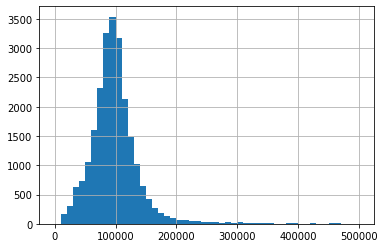

In [60]:
data['square_meter'].hist(bins=50, range = (0, 500000)) 
plt.show()

Медианное значение 95000 за квадратный метр. По гистограме примерно видно, что основная стоимость за квадратный метр лежит в промежутке от 40000 до 150000.

In [61]:
#Количество комнат
print(data['rooms'].max())
print(data['rooms'].min())
print(data['rooms'].median())

19
0
2.0


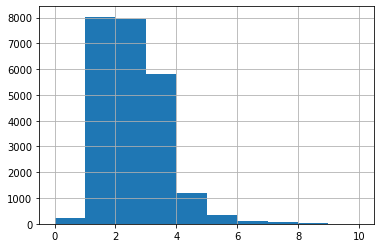

In [62]:
data['rooms'].hist(bins=10, range = (0, 10)) 
plt.show()

Медианное значение комнат - 2. По гистограме видно, что квартиры имеют в основном от 1 до 4 комнат.

In [63]:
#Итоговая цена
print(data['last_price'].max())
print(data['last_price'].min())
print(data['last_price'].median())

763000000
12190
4650000.0


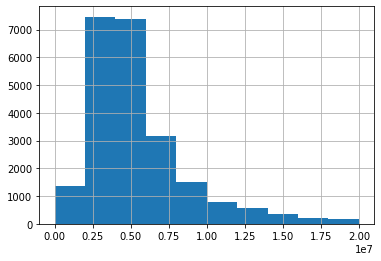

In [64]:
data['last_price'].hist(bins=10, range = (0, 20000000)) 
plt.show()

Медианное значение цены 4650000. По гистограме видно, что основные значения цен лежат примерно в промежутке от 2200000 до 10000000.

In [65]:
#Высота потолков
print(data['ceiling_height'].max())
print(data['ceiling_height'].min())
print(data['ceiling_height'].median())

100.0
1.0
2.65


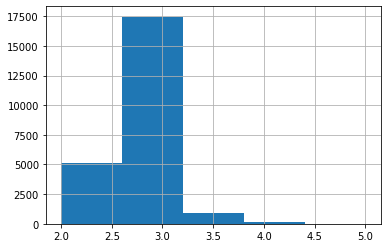

In [66]:
data['ceiling_height'].hist(bins=5, range = (2, 5)) 
plt.show()

Медианное значение высоты потолков 2,65 м. По гистограме видно, что основные значения цен лежат примерно в промежутке от 2 м до 3,2 м.

### Промежуточный итог исследования:
- Медианное значение цены за квадратный метр 95000 рублей. По гистограме примерно видно, что основная стоимость за квадратный метр лежит в промежутке от 40000 до 150000 рублей.
- Медианное значение комнат - 2. По гистограме видно, что квартиры имеют в основном от 1 до 4 комнат.
- Медианное значение итоговой цены 4650000. По гистограме видно, что основные значения цен лежат примерно в промежутке от 2200000 до 10000000.
- Медианное значение высоты потолков 2,65 м. По гистограме видно, что основные значения цен лежат примерно в промежутке от 2 м до 3,2 м.

### Изучу время продажи квартиры. 

In [67]:
print(data['days_exposition'].max())
print(data['days_exposition'].min())
print(data['days_exposition'].median())
print(data['days_exposition'].mean())

1580
1
95.0
180.88863436982163


Из-за выбросов очень большая разница между медианным значением - 95 и средним - 180,9.

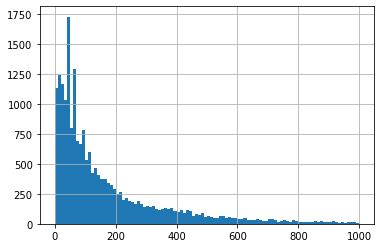

In [68]:
#Строю гистограму.
data['days_exposition'].hist(bins=100, range = (0, 1000)) 
plt.show()

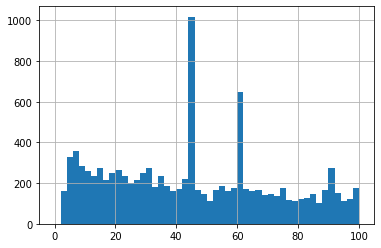

In [69]:
#Обрежу значения до 100, чтобы оценить очень быстрые продажи.
data['days_exposition'].hist(bins=50, range = (0, 100)) 
plt.show()

Предполагаю, что выбросы в районе 45, 60 и 90 дней — это оплаченные периоды размещения объявления.

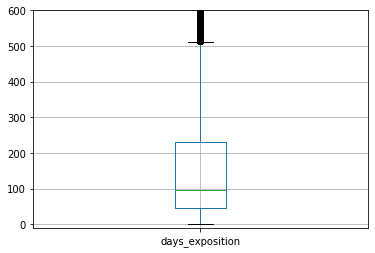

In [70]:
#Построю boxplot, чтобы оценить необычно долгие продажи.
import seaborn as sns
plt.ylim(-10, 600)
data.boxplot('days_exposition')

### Промежуточный итог:
- Обычно продажа квартиры занимает 95 дней (около 3 месяцев). 
- Необычно долго: более 500 дней.
- Очень быстро: менее 45 дней.

### Убираю редкие и выбивающиеся значения. 

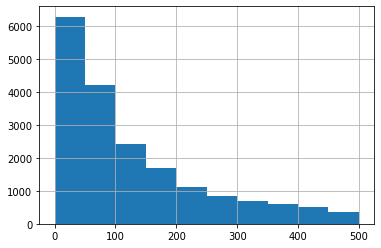

In [71]:
#Отрезаю все значения, которые больше 500 дней.
data_dexp_500 = data.query('days_exposition < 500')

data_dexp_500['days_exposition'].hist(bins=10, range = (0, 500))

In [72]:
#Посчитаю медиану и среднее.
print(data_dexp_500['days_exposition'].median())
print(data_dexp_500['days_exposition'].mean())

84.0
127.045725858026


Также заметная разница меджу медианным значением - 84 и средним - 127.

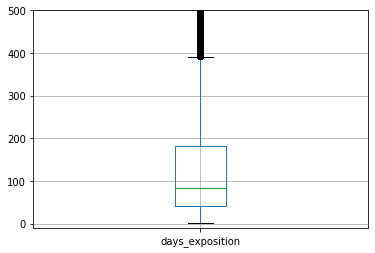

In [73]:
#Построю boxplot, чтобы оценить необычно долгие продажи.
plt.ylim(-10, 500)
data_dexp_500.boxplot('days_exposition')

После изменений итоги изменились.

- Обычно продажа квартиры занимает 84 дня. 
- Необычно долго: более 400 дней.

Значения уменьшились относительно расчетов с выбросами.

### Промежуточный итог исследования:
Анализ всех данных и данных с уменьшением показал, что медианное значение количества дней продажи заметно изменилось (на 12%) с 95 дней до 84.

### Рассмотрю площади.

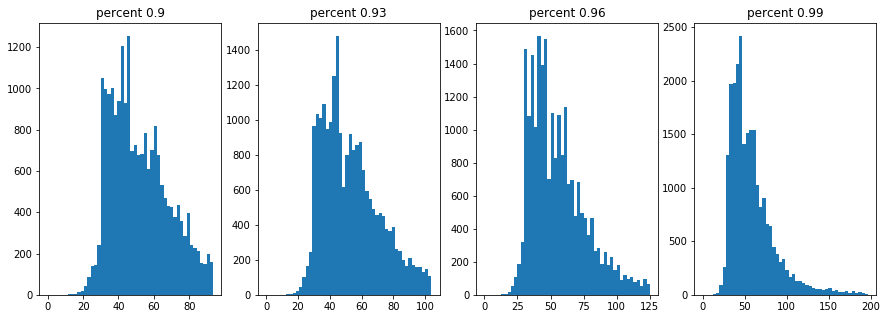

In [74]:
#Построю гистограммы.
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
j = 0
for i in [0.9, 0.93, 0.96, 0.99]:
    axs[j].hist(data['total_area'], bins = 50, range = (0, data['total_area'].quantile(i)))
    axs[j].set_title('percent ' + str(i))
    j += 1

Гляда на гистогамы, делаю вывод, что типичные предложения лежат в промежутке 15 - 200 кв м.

In [75]:
#Оцениваю количество отрезанных данных.
100 - (data.query('15 <= total_area <= 200').shape[0]/data.shape[0])*100

0.9831638465758061

Отрезаю данные меньше 1%. Считаю, что такая корректировка не испортит выводы.

In [76]:
data = data.query('15 <= total_area <= 200')

### Рассмотрю цены.

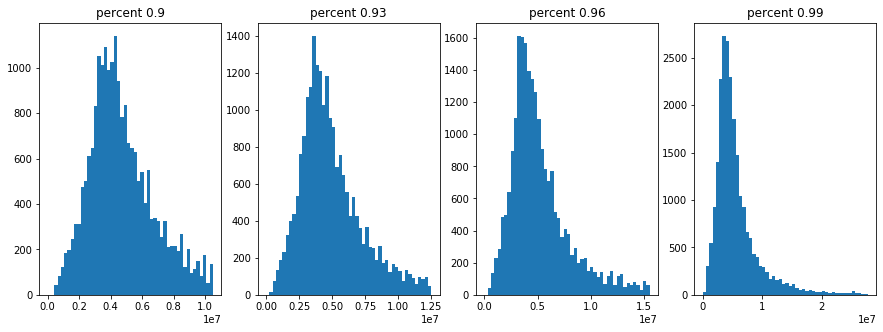

In [77]:
#Построю гистограммы.
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
j = 0
for i in [0.9, 0.93, 0.96, 0.99]:
    axs[j].hist(data['last_price'], bins = 50, range = (0, data['last_price'].quantile(i)))
    axs[j].set_title('percent ' + str(i))
    j += 1

Гляда на гистогамы, делаю вывод, что типичные предложения лежат в промежутке 700000 - 20000000. 

In [78]:
#Оцениваю количество отрезанных данных.
100 - (data.query('700000 <= last_price <= 20000000').shape[0]/data.shape[0])*100

2.518537458450524

Считаю в данном случае валидно убрать 2,5% данных.

In [79]:
data = data.query('700000 <= last_price <= 20000000')

### Изучу, какие факторы больше всего влияют на стоимость квартиры 

- Зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. 
- Есть ли зависимость от даты размещения: дня недели, месяца и года.

###  Зависимость цены от стоимости квадратного метра.

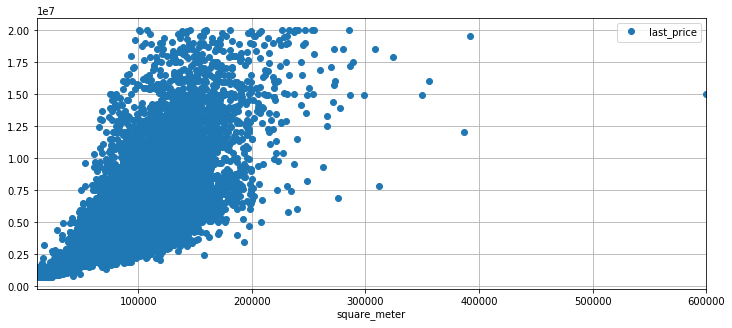

In [80]:
#Изучу заивисимость цены от квадратного метра. Построю график по сводной таблице, чтобы увидеть выбросы.
data.pivot_table(index = 'square_meter', values = 'last_price').plot(grid=True, figsize=(12, 5), style='o')

Считаю сейчас, что выбросы лежат за квадратом 50000000х300000. Уберу их и построю новый график.

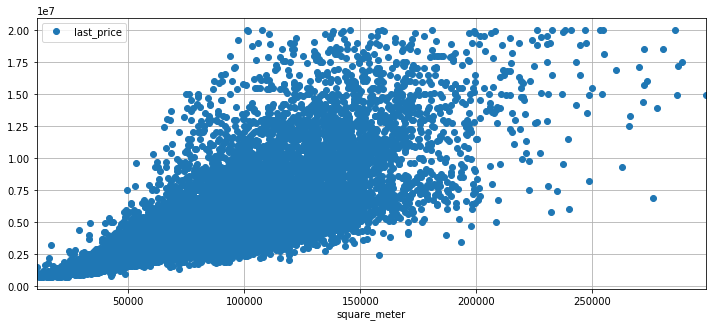

In [81]:
(data
 .query('square_meter<300000 and last_price<50000000')
 .pivot_table(index = 'square_meter', values = 'last_price')
 .plot(grid=True, figsize=(12, 5), style='o'))

На этом графике непонятна зависимость. Поэтому для большей наглядности округлю цену квадратного метра до 10000 и применю для сводной таблицы медиану, т.к. она устойчивее к выбросам, чем среднее.

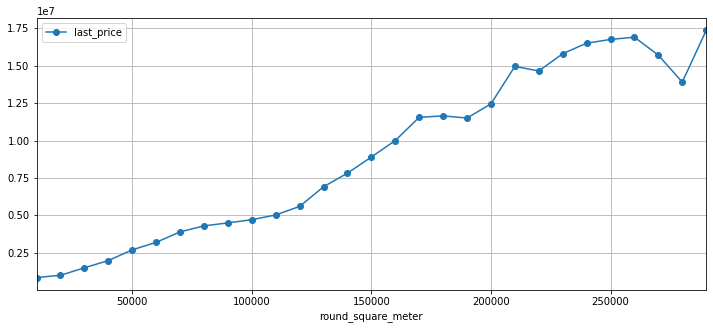

In [82]:
data['round_square_meter'] = round(data['square_meter'], -4)
(data
    .query('round_square_meter<300000 and last_price<50000000')
    .pivot_table(index = 'round_square_meter', values = 'last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5), style='o-'))

### Вывод:
Вижу зависимость цены от стоимости квадратного метра до точки 260000 за квадратный метр. Дальше зависимость меняется, считаю, что дальше идут редкие значения для элитного жилья. 

###  Зависимость цены от количества комнат.

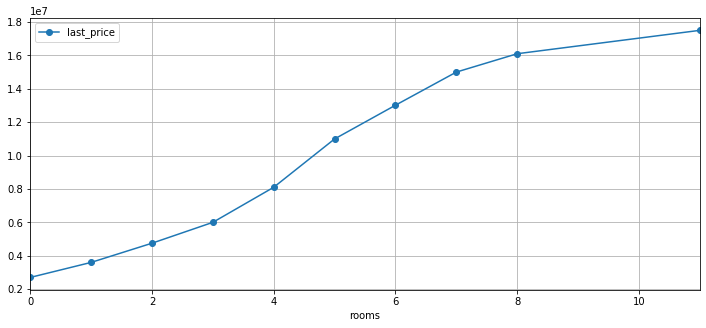

In [83]:
#Изучу заивисимость цены от количества комнат. Построю график по сводной таблице, чтобы увидеть выбросы.
(data
 .pivot_table(index = 'rooms', values = 'last_price', aggfunc='median')
 .plot(grid=True, figsize=(12, 5), style='o-'))

На этом графике неочевидна зависимость. Поэтому ограничю цену (как и в предыдущем случае) 50000000, применю для сводной таблицы медиану, т.к. она устойчивее к выбросам, чем среднее.

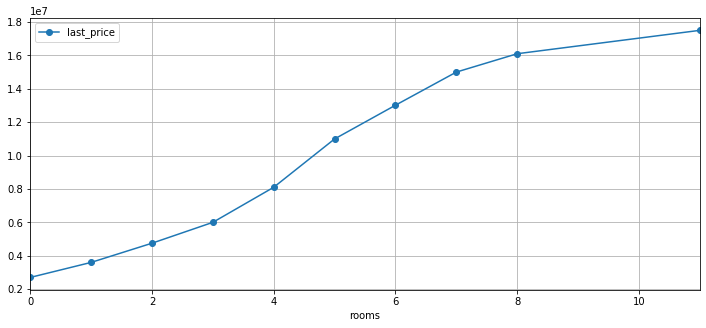

In [84]:
(data
 .query('last_price<50000000')
 .pivot_table(index = 'rooms', values = 'last_price', aggfunc='median')
 .plot(grid=True, figsize=(12, 5), style='o-'))

### Вывод:
Вижу зависимость цены от количества комнат в квартире. Чем больше комнат в квартире, тем больше цена.

###  Зависимость цены от типа этажа.

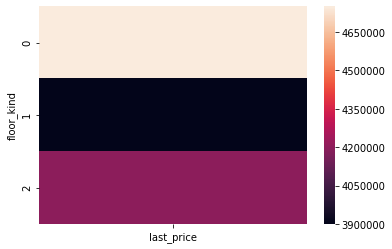

In [85]:
#Изучу заивисимость цены от типа этажа. Построю график по сводной таблице.
ax = sns.heatmap(data.pivot_table(index = 'floor_kind', values = 'last_price', aggfunc='median'))

### Вывод:
- квартиры на 1-ом этаже дешевле остальных категорий,
- квартиры в центре дома стоят дороже остальных категорий,
- квартиры на последнем этаже уступают в стоимости квартирам в центре дома.

###  Зависимость цены от удаленности от центра.

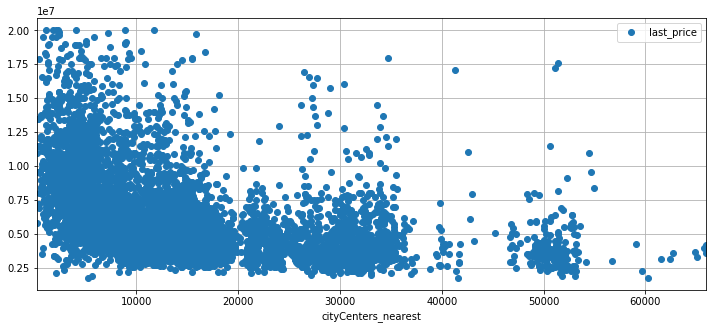

In [86]:
#Изучу зависимость цены от удаленности от центра. Построю график по сводной таблице, чтобы увидеть выбросы.
(data
 .pivot_table(index = 'cityCenters_nearest', values = 'last_price', aggfunc='median')
 .plot(grid=True, figsize=(12, 5), style='o'))

На этом графике неочевидна зависимость. Поэтому ограничу цену (как и в предыдущем случае) 50000000, применю для сводной таблицы медиану, т.к. она устойчивее к выбросам, чем среднее.

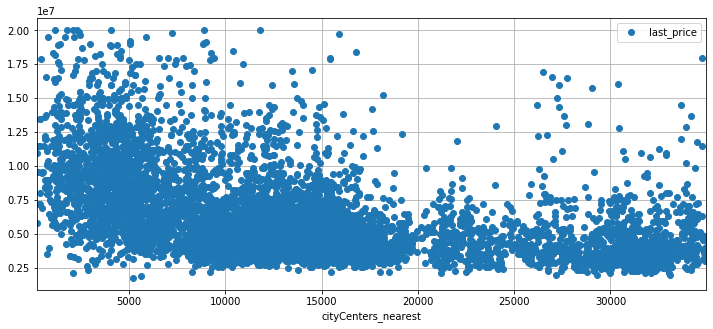

In [87]:
(data
 .query('cityCenters_nearest<35000 and last_price<50000000')
 .pivot_table(index = 'cityCenters_nearest', values = 'last_price')
 .plot(grid=True, figsize=(12, 5), style='o'))

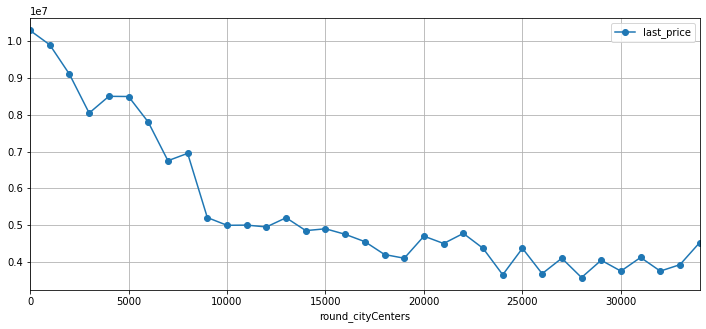

In [88]:
#Столбец 'cityCenters_nearest' типа Int64, к нему не применить round. Поэтому заполняю пропуски большим значением,
#которое потом отржется срезом и округляю.
data['round_cityCenters'] = round(data['cityCenters_nearest'].fillna(100000).astype(int),-3)

(data
    .query('round_cityCenters<35000 and last_price<50000000')
    .pivot_table(index = 'round_cityCenters', values = 'last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5), style='o-'))

### Вывод: 
При растоянии до 10 км вижу зависимоть между ценой и удаленностью от центра: чем дальше, тем дешевле. При большем расстоянии явной зависимости нет (уже слишком далеко).

In [89]:
for i in ['round_square_meter', 'rooms', 'floor_kind', 'round_cityCenters']:
    print(data[i].corr(data['last_price']))

0.6358274134319551
0.502523154250524
-0.09136845512919065
-0.4683594241660896


По коэффициентам корреляции видно, что:
- наибольшую прямую корреляцию к цене среди представленных признаков имеют признаки: округленная стоимость квадратного метра и количество комнат,
- обратную корреляцию к цене имеет признак: округленное расстояние до центара,
- корреляции нет у признака "тип этажа" (но это категориальный признак, линейной зависимости от цены нет).

###  Зависимость цены от дня недели размещения объявления.

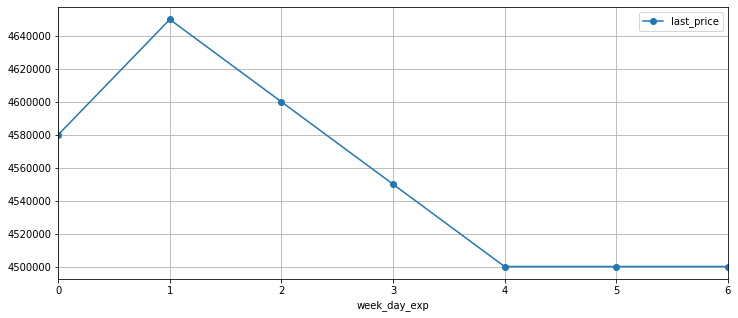

In [91]:
#Изучу зависимость цены от дня недели размещения объявления. Построю график по сводной таблице.
(data
 .pivot_table(index = 'week_day_exp', values = 'last_price', aggfunc='median')
 .plot(grid=True, figsize=(12, 5), style='o-'))

### Вывод:
На графике видна зависимость: со вторника по воскресенье стоимость убывает. В понедельник она на уровне четверга.

###  Зависимость цены от года размещения объявления.

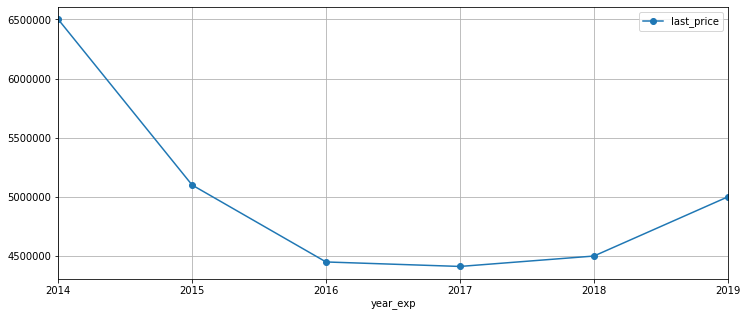

In [92]:
#Изучу зависимость цены от года размещения объявления. Построю график по сводной таблице.
(data
 .pivot_table(index = 'year_exp', values = 'last_price', aggfunc='median')
 .plot(grid=True, figsize=(12, 5), style='o-'))

### Вывод:
Видно, что с 2014 по 2017 стоимость снижалась (видимо, последствия кризиса). С середина 2017 начался медленный рост.

###  Зависимость цены от месяца размещения объявления.

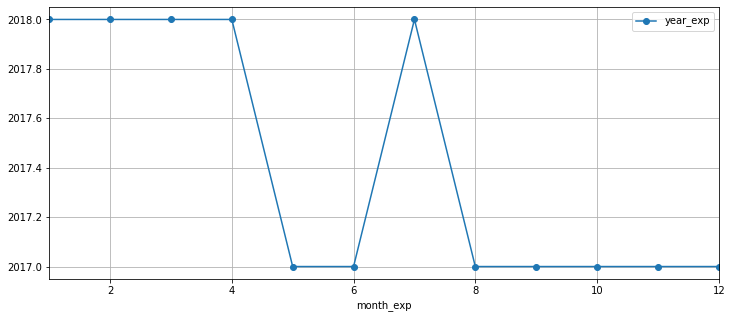

In [93]:
#Изучу зависимость цены от месяца размещения объявления. Построю график по сводной таблице.
(data
 .pivot_table(index = 'month_exp', values = 'year_exp', aggfunc='median')
 .plot(grid=True, figsize=(12, 5), style='o-'))

### Вывод:
Стоимость снижается с апреля по июнь: в этот период покупателям интереснее покупки дач/съем загородных домов. Поэтому, возможно, продажи квартир снижаются, продавцы сбавляют стоимость, либо снимают объявления.

С июля по ноябрь идет увеличение относительно июня, но стоимость колеблется (нет четкой зависимости).

С ноября по декабрь стоимость одинаковая, а с января по апрель идет рост из точки меньшей, чем в декабре (праздники, люди не покупают квратиры, а только задумывают менять что-то).

### Добавлю расчет коэффициентов корреляции между днями/месяцами/годами.

In [94]:
for i in ['week_day_exp', 'month_exp', 'year_exp']:
    print(data[i].corr(data['last_price']))

-0.01644226010475038
0.004501469592881122
-0.022491890772208978


По коэффициентам нет линейной зависимости между признаками, что подтверждается графиками.

### Промежуточный итог исследования:
Вижу зависимость цены от:
- стоимости квадратного метра до точки 260000 за квадратный метр (дальше зависимость меняется, считаю, что дальше идут редкие значения для элитного жилья), коэффициент корреляции 0.64;
- количества комнат в квартире: чем больше комнат в квартире, тем больше цена, коэффициент корреляции 0.5;
- удаленности от центра при растоянии до 10 км: чем дальше, тем дешевле (при большем расстоянии явной зависимости нет), коэффициент корреляции -0.47;
- расположения квартиры на этаже относительно всего дома: дешевле всего на 1 этаже, затем идут квартиры на послденем этаже, а дороже всего квартиры между последними этажами (в "центре" здания), коэффициент корреляции -0.09.

Зависимость цены от дня недели/месяца/года размещения:
- дни недели: со вторника по воскресенье стоимость убывает, в понедельник она на уровне четверга, коэффициент корреляции -0.02;
- годы: с 2014 по 2017 стоимость снижалась, с 2017 начался рост, коэффициент корреляции 0.005;
- месяцы: стоимость снижается с апреля по июнь (в этот период покупателям интереснее ппокупки дач/съем загородных домов), с июля по ноябрь идет увеличение относительно июня, но стоимость колеблется (нет четкой зависимости),с ноября по декабрь стоимость одинаковая, а с января по апрель идет рост из точки меньшей, чем в декабре (праздники, люди не покупают квратиры, а только задумывают менять что-то), коэффициент корреляции -0.02.

### Выберу 10 населённых пунктов с наибольшим числом объявлений. 

Посчитаю среднюю цену квадратного метра в этих населённых пунктах. Выделю населённые пункты с самой высокой и низкой стоимостью жилья.

In [95]:
#Сгруппирую значения по названию насленного пункта, выведу 10 с наибольшим количеством.
print(data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10))

locality_name
Санкт-Петербург    14992
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           397
Пушкин               359
Колпино              337
Парголово            326
Гатчина              307
Выборг               235
Name: locality_name, dtype: int64


In [96]:
#Посчитаю среднюю цену квадратного метра в этих населённых пунктах.
city_mean=(data.groupby('locality_name')
      .agg(['mean', 'count'])['square_meter']
       .sort_values(by = 'count', ascending=False).head(10))
print(city_mean)

                          mean  count
locality_name                        
Санкт-Петербург  108750.509138  14992
Мурино            86087.055932    590
Кудрово           95324.476695    472
Шушары            78676.904545    440
Всеволожск        67213.785894    397
Пушкин           101867.041783    359
Колпино           75332.866469    337
Парголово         90331.840491    326
Гатчина           68745.693811    307
Выборг            58454.076596    235


In [97]:
print(city_mean['mean'].max().round(0))
print(city_mean['mean'].min().round(0))

108751.0
58454.0


### Промежуточный итог исследования:
- город с максимальной стоимостью квадратного метра среди 10 городов с наибольшим числом объявлений: Санкт-Петербург,
- город с минимальной стоимостью квадратного метра среди 10 городов с наибольшим числом объявлений: Выборг.

###  Выясню, как цена зависит от удалённости от центра Санкт-Петербурга.

In [98]:
#Добавляю новый столбец с км.
data['cityCenters_km'] = data['cityCenters_nearest']/1000
data['cityCenters_km'] = round(data['cityCenters_km'], 0)
data['cityCenters_km'] = data['cityCenters_km'].astype('float32').astype('Int64')

#Делаю срез по Санкт-Петербургу и ищу среднюю цену каждого км.
spb_data = data.query('locality_name == "Санкт-Петербург"')
print(spb_data.groupby('cityCenters_km')['last_price'].mean())

cityCenters_km
0     1.019857e+07
1     1.059987e+07
2     9.956328e+06
3     9.027130e+06
4     9.306218e+06
5     9.336980e+06
6     8.511035e+06
7     7.954060e+06
8     7.887445e+06
9     6.437557e+06
10    6.071918e+06
11    5.916907e+06
12    5.705781e+06
13    5.945274e+06
14    5.556291e+06
15    5.703855e+06
16    5.280905e+06
17    5.156086e+06
18    4.868169e+06
19    5.037675e+06
20    5.951465e+06
21    5.493469e+06
22    5.415524e+06
23    4.689843e+06
24    3.854430e+06
25    4.052840e+06
26    3.973013e+06
27    8.300000e+06
28    5.026429e+06
29    4.236667e+06
Name: last_price, dtype: float64


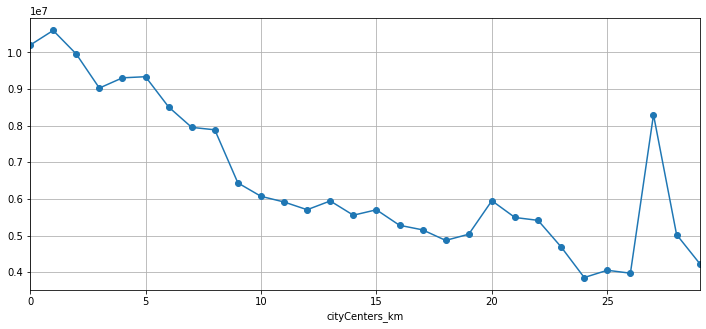

In [99]:
#Строю график зависимости цены от удаленности от центра.
spb_data.groupby('cityCenters_km')['last_price'].mean().plot(grid=True, figsize=(12, 5), style='o-')

### Промежуточный итог исследования:
Центральная зона - радиус 3 км. 

###  Изучу влияние факторов на стоимость квартир в центре.

Выделю сегмент квартир в центре. Проанализирую эту территорию и изучу следующие параметры: площадь, цена, число комнат, высота потолков. Также выделю факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [100]:
#Выделю квартиры в центре.
spb_data_centre = spb_data.query('cityCenters_km <= 3')

Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 

In [101]:
#Площадь квартир
print(spb_data_centre['square_meter'].max())
print(spb_data_centre['square_meter'].min())
print(spb_data_centre['square_meter'].median())

387096
28919
111764.0


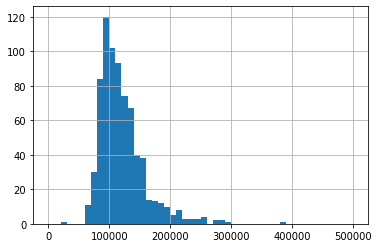

In [102]:
spb_data_centre['square_meter'].hist(bins=50, range = (0, 500000)) 
plt.show()

Медианное значение 117391 за квадратный метр. По гистограме примерно видно, что основная стоимость за квадратный метр лежит в промежутке от 70000 до 220000.

In [103]:
#Количество комнат
print(spb_data_centre['rooms'].max())
print(spb_data_centre['rooms'].min())
print(spb_data_centre['rooms'].median())

11
0
3.0


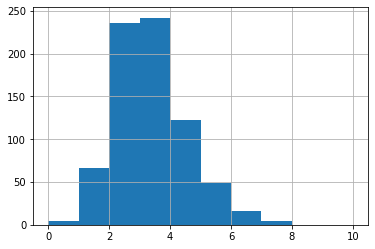

In [104]:
spb_data_centre['rooms'].hist(bins=10, range = (0, 10)) 
plt.show()

По гистограме видно, что квартиры имеют в основном от 1 до 6 комнат.

In [105]:
#Итоговая цена
print(spb_data_centre['last_price'].max())
print(spb_data_centre['last_price'].min())
print(spb_data_centre['last_price'].median())

20000000
2100000
8900000.0


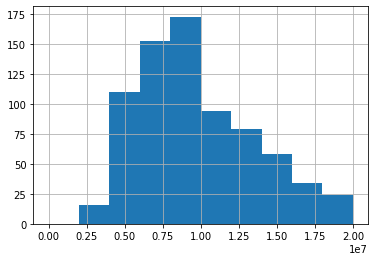

In [106]:
spb_data_centre['last_price'].hist(bins=10, range = (0, 20000000)) 
plt.show()

Медианное значение цены 9800000. По гистограме видно, что основные значения цен лежат примерно в промежутке от 4200000 до 20000000.

In [107]:
#Высота потолков
print(spb_data_centre['ceiling_height'].max())
print(spb_data_centre['ceiling_height'].min())
print(spb_data_centre['ceiling_height'].median())

27.0
2.5
3.0


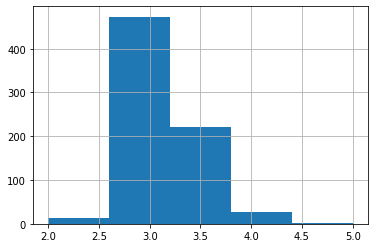

In [108]:
spb_data_centre['ceiling_height'].hist(bins=5, range = (2, 5)) 
plt.show()

Медианное значение высоты потолков 3м. По гистограме видно, что основные значения цен лежат примерно в промежутке от 2,65 м до 3,75 м.

### Промежуточный итог исследования:
- Медианное значение цены за квадратный метр 117000 рублей. По гистограме примерно видно, что основная стоимость за квадратный метр лежит в промежутке от 70000 до 220000 рублей.
- Медианное значение комнат - 3. По гистограме видно, что квартиры имеют в основном от 1 до 6 комнат.
- Медианное значение итоговой цены 9800000. По гистограме видно, что основные значения цен лежат примерно в промежутке от 4200000 до 10000000.
- Медианное значение высоты потолков 3 м. По гистограме видно, что основные значения цен лежат примерно в промежутке от 2,65 м до 3,75 м.

### Зависимость цены квартиры в центре от числа комнат.

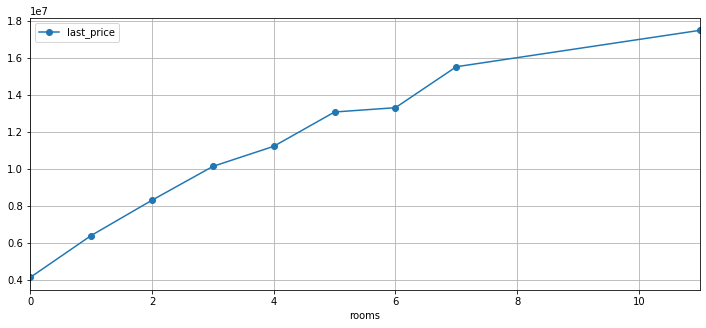

In [109]:
#Изучу зависимость цены от числа комнат. Построю график по сводной таблице, чтобы увидеть выбросы.
spb_data_centre.pivot_table(index = 'rooms', values = 'last_price').plot(grid=True, figsize=(12, 5), style='o-')

Для уточнения зависимости ограничю цену 50000000 (как делала для всего города), применю для сводной таблицы медиану, т.к. она устойчивее к выбросам, чем среднее.

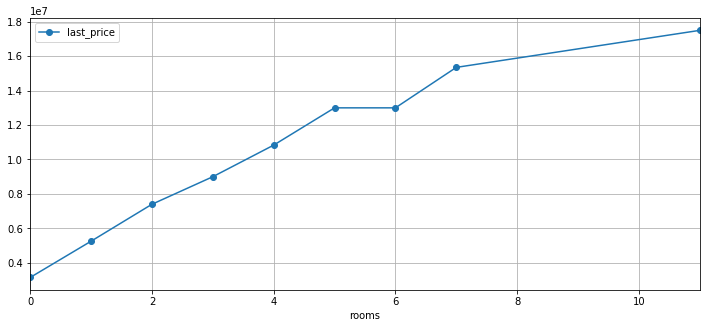

In [110]:
(spb_data_centre
 .query('last_price<50000000')
 .pivot_table(index = 'rooms', values = 'last_price', aggfunc='median')
 .plot(grid=True, figsize=(12, 5), style='o-'))

### Вывод: 
Чем больше комнат, тем выше стоимость квартира в центре.
Аналогичный вывод был получен для всего города.

### Зависимость цены квартиры в центре от этажа.

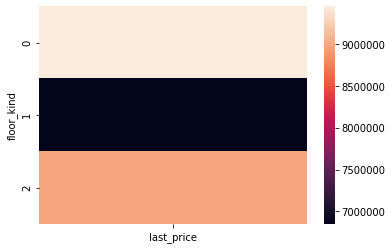

In [111]:
#Изучу заивисимость цены от типа этажа. Построю график по сводной таблице.
ax = sns.heatmap(spb_data_centre.pivot_table(index = 'floor_kind', values = 'last_price', aggfunc='median'))

### Вывод:
- квартиры на 1-ом этаже дешевле остальных категорий,
- квартиры в центре дома стоят дороже остальных категорий,
- квратиры на последнем этаже уступают в стоимости квартирам в центре дома.

Аналогичный вывод был получен для всего города.

### Зависимость цены квартиры в центре от удаленности от центра.

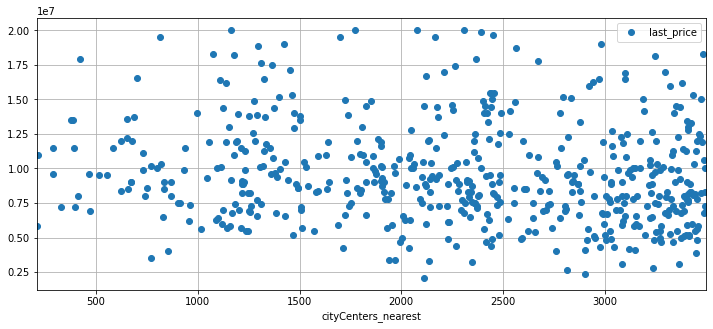

In [112]:
#Изучу заивисимость цены от удаленности от центра. Построю график по сводной таблице, чтобы увидеть выбросы.
(spb_data_centre
 .pivot_table(index = 'cityCenters_nearest', values = 'last_price', aggfunc='median')
 .plot(grid=True, figsize=(12, 5), style='o'))

На этом графике неочевидна зависимость. Поэтому ограничу цену (как и в предыдущем случае) 50000000, применю для сводной таблицы медиану, т.к. она устойчивее к выбросам, чем среднее.

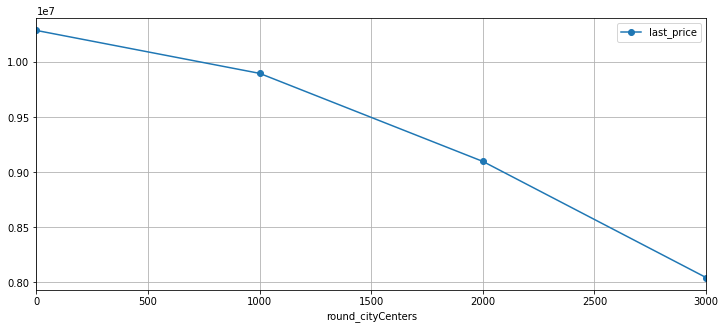

In [113]:
(spb_data_centre
    .query('last_price<50000000')
    .pivot_table(index = 'round_cityCenters', values = 'last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5), style='o-'))

### Вывод:
Зависимость между ценой и удаленностью от центра: чем дальше, тем дешевле.

Аналогичный вывод был получен для всего города.

###  Зависимость цены квартиры в центре от дня недели размещения объявления.

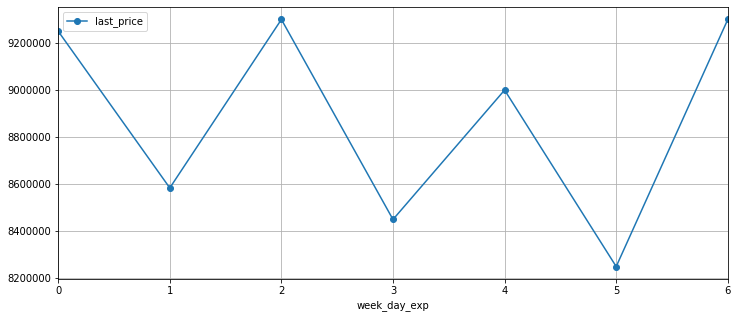

In [114]:
#Изучу заивисимость цены от дня недели размещения объявления. Построю график по сводной таблице.
(spb_data_centre
 .pivot_table(index = 'week_day_exp', values = 'last_price', aggfunc='median')
 .plot(grid=True, figsize=(12, 5), style='o-'))

### Вывод:
Со среды по субботу стоимость убывает. С воскресенья по вторник зависимости нет.
Вывод отличается от того, который получен для всего города.

### Вывод для всего города:
Со вторника по воскресенье стоимость убывает. В понедельник она на уровне четверга.

###  Зависимость цены квартиры в центре от года размещения объявления.

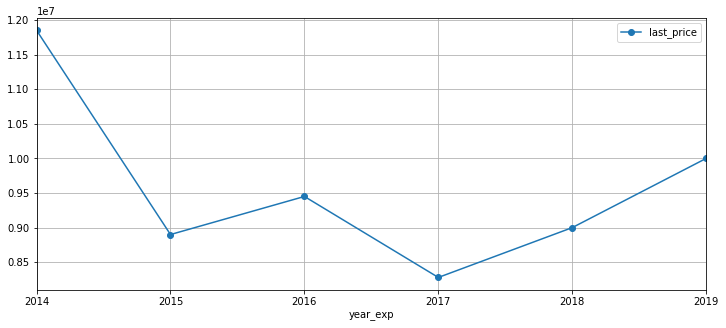

In [115]:
#Изучу заивисимость цены от года размещения объявления. Построю график по сводной таблице.
(spb_data_centre
 .pivot_table(index = 'year_exp', values = 'last_price', aggfunc='median')
 .plot(grid=True, figsize=(12, 5), style='o-'))

### Вывод:
Видно, что с 2014 по 2017 стоимость снижалась (видимо, последствия кризиса). С 2017 начался медленный рост.
Аналогичный вывод был получен для всего города.

###  Зависимость цены квартиры в центре от месяца размещения объявления.

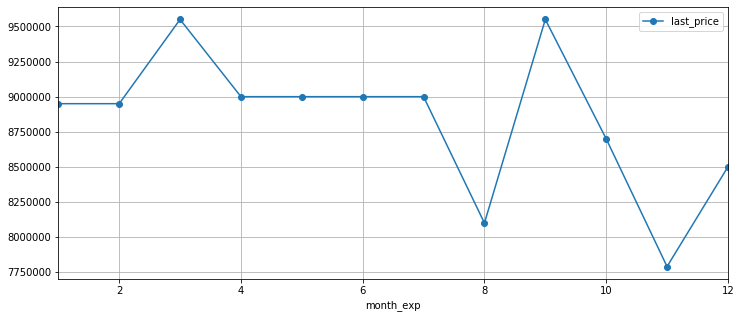

In [116]:
#Изучу заивисимость цены от дня недели размещения объявления. Построю график по сводной таблице.
(spb_data_centre
 .pivot_table(index = 'month_exp', values = 'last_price', aggfunc='median')
 .plot(grid=True, figsize=(12, 5), style='o-'))

### Вывод:
- С января по апрель идет рост из точки меньшей, чем в декабре (аналогично всему городу).
- Стоимость снижается с апреля по август (для всего города по июнь) со скачком вверх в мае: в этот период покупателям интереснее ппокупки дач/съем загородных домов. Поэтому, возможно, продажи квартир снижаются, продавцы сбавляют стоимость, либо снимают обхявления. Этот отрезок похож, но имеют другую длительность.

Далее для всего города:
- С июня по ноябрь идет увеличение относительно июня, но стоимость колеблется (нет четкой зависимости).
- С ноября по декабрь стоимость одинаковая., а с января по апрель идет рост из точки меньшей, чем в декабре (праздники, люди не покупают квратиры, а только задумывают менять что-то).

А для центра:
- Идет снижение стоимости с сентября по ноябрь (похожее на весеннее снижение цен).
- Рост стоимости с ноября по декабрь.

### Промежуточный итог исследования:

Вижу зависимость цены от:
- стоимости квадратного метра: чем больше стоимость, тем дороже цена квартиры, коэффициент корреляции 0.4;
- количества комнат в квартире: чем больше комнат в квартире, тем больше цена, коэффициент корреляции 0.49;
- удаленности от центра: чем дальше, тем дешевле, коэффициент корреляции -0.16;
- расположения квартиры на этаже относительно всего дома: дешевле всего на 1 этаже, затем идут квартиры на послденем этаже, а дороже всего квартиры между последними этажами (в "центре" здания), коэффициент корреляции -0.08.

Зависимость цены от дня недели/месяца/года размещения:
- дни недели: со среды по субботу стоимость убывает, с воскресенья по вторник зависимости нет, коэффициент корреляции -0.009;
- годы: с 2014 по 2017 стоимость снижалась, с 2017 начался рост, коэффициент корреляции 0.04;
- месяцы: стоимость снижается с апреля по август, с сентября по ноябрь идет снижение стоимости, с ноября по декабрь стоимость растет, а с января по апрель идет рост из точки меньшей, чем в декабре, коэффициент корреляции -0.09.

In [117]:
for i in ['round_square_meter', 'rooms', 'floor_kind', 'round_cityCenters']:
    print(spb_data_centre[i].corr(spb_data_centre['last_price']))

0.4041361767786183
0.48509554195703697
-0.08290592331365534
-0.156920366405242


По коэффициентам корреляции видно, что:
- наибольшую прямую корреляцию к цене среди представленных признаков имеют признаки: округленная стоимость квадратного метра и количество комнат,
- корреляции нет у признаков "тип этажа" (но это категориальный признак, линейной зависимости от цены нет) и удаленность от центра.

### Добавлю расчет коэффициентов корреляции между днями/месяцами/годами.

In [118]:
for i in ['week_day_exp', 'month_exp', 'year_exp']:
    print(spb_data_centre[i].corr(spb_data_centre['last_price']))

-0.009908201814795419
-0.09234902599429749
0.03940324326186706


По коэффициентам нет линейной зависимости между признаками, что подтверждается графиками.

## 5. Общий вывод: подведение итогов

#### Во время исследования был получен список 10 городов с самым большим количеством объявлений.
Эти города:  Санкт-Петербург, Мурино, Кудрово, Шушары, Всеволожск, Пушкин, Колпино, Парголово, Гатчина, Выборг. Города в списке: либо города в составе Санкт-Петербурга, либо значимые областные центры.
Из этой выборки:
- город с максимальной стоимостью квадратного метра: Санкт-Петербург,
- город с минимальной стоимостью квадратного метра: Выборг.

#### Был проведен анализ центра Санкт-Петерубурга и всей выборки.
Былы определена центральная часть Санкт-Петерубурга - зона в радиусе 3 км. Были сделаны исследования для сравнения этой зоны и всей выборки, результаты которых ниже.

#### Можно сравнить значения параметров квартир во всей выборке и в центре Санкт-Петербурга:
- весь город: медианное значение цены за квадратный метр 95000 рублей, основной промежуток цены: [40000..150000] рублей, а в центре: 117000 и [70000..220000] соответственно;
- весь город: медианное количество комнат - 2, основной промежуток: [1..4] комнаты, а в центре 3 и [1..6] соответственно;
- весь город: медианное значение итоговой цены 4650000, основная стоимость [2200000..10000000]а в центре: 9800000 и [4200000..20000000] соответственно;
- весь город: медианное значение высоты потолков 2,65м, основные значения от 2м до 3,2м, а в центре: 3м и от 2,65м до 3,75м соответственно.

Можно сделать вывод, что стоимость квартир в центре выше, чем во всем городе. Цена обусловлена тем, что:
- квадратный метро стоит дороже,
- комнат в квартирах больше,
- потолки выше.

#### Если сравнивать зависимость стоимости во всей выборке и в центре Санкт-Петербурга, то видно, что стоимость зависит от одинаковых параметров подобным образом:
1. стоимости квадратного метра, 
2. количества комнат, 
3. удаленности от центра, 
4. расположения квартиры на этаже относительно всего дома,
5. года размещения объявления.

Похожая, но разного характера зависимость стоимости во всей выборке и в центре Санкт-Петербурга от дня недели и месяца размещения объявления.